# Foreseeing Variable Problems When Building ML Models

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

## Identifying numerical and categorical variables

In [4]:
file_name = "data/boston_listings.csv"
airbnb_boston = pd.read_csv(file_name)

In [5]:
airbnb_boston.head()

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_dict,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,100%,44%,t,East Boston,5,"['email', 'phone', 'reviews']",f,East Boston,East Boston,2128,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$125.00,$75.00,11,20,20,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28
1,5506,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,"['email', 'phone', 'reviews', 'kba']",t,Roxbury,Roxbury,2119,42.32981,-71.09559,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$145.00,$60.00,1,14,44,307,106,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,"['email', 'phone', 'reviews', 'kba']",t,Roxbury,Roxbury,2119,42.32994,-71.09351,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$169.00,$80.00,1,4,19,266,115,96.0,10.0,10.0,10.0,10.0,9.0,10.0,t,STR-404620,t,f,strict_14_with_grace_period,0.88
3,8789,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Guests have access to the full unit,I'm available for questions and/or issues.,NaN,26988,2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Beacon Hill,Downtown,2108,42.35919,-71.06265,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$99.00,$250.00,17,42,42,290,24,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,0.35
4,10730,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Guests have access to everything in the unit.,I'm available as needed.,"NO SMOKING, NO PETS. $100 move-in fee payable ...",26988,2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Beacon Hill,Downtown,2108,42.35840,-71.06185,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$150.00,$250.00,28,29,29,42,31,95.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,0.24


In [6]:
airbnb_boston.shape

(3845, 51)

In [7]:
airbnb_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3845 non-null   int64  
 1   name                         3845 non-null   object 
 2   summary                      3765 non-null   object 
 3   access                       2208 non-null   object 
 4   interaction                  2589 non-null   object 
 5   house_rules                  2855 non-null   object 
 6   host_id                      3845 non-null   int64  
 7   host_since                   3845 non-null   object 
 8   host_location                3842 non-null   object 
 9   host_response_time           3283 non-null   object 
 10  host_response_rate           3283 non-null   object 
 11  host_acceptance_rate         3585 non-null   object 
 12  host_is_superhost            3845 non-null   object 
 13  host_neighbourhood

In [8]:
airbnb_boston.dtypes

id                               int64
name                            object
summary                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_neighbourhood              object
host_total_listings_count        int64
host_verifications              object
host_identity_verified          object
neighbourhood                   object
neighbourhood_cleansed          object
zipcode                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates             

In [10]:
airbnb_boston.dtypes.value_counts()

object     29
float64    13
int64       9
Name: count, dtype: int64

In [11]:
airbnb_boston['bedrooms'].unique()

array([ 1.,  0.,  3.,  2.,  4.,  5., nan,  6., 13.,  8.,  7.])

In [13]:
airbnb_boston['price'].unique()[0:20]

array(['$125.00', '$145.00', '$169.00', '$99.00', '$150.00', '$179.00',
       '$50.00', '$154.00', '$115.00', '$148.00', '$275.00', '$221.00',
       '$95.00', '$75.00', '$175.00', '$110.00', '$79.00', '$140.00',
       '$225.00', '$200.00'], dtype=object)

In [14]:
airbnb_boston.nunique()

id                             3845
name                           3682
summary                        2722
access                         1492
interaction                    1405
house_rules                    1531
host_id                        1331
host_since                     1080
host_location                   123
host_response_time                4
host_response_rate               35
host_acceptance_rate             73
host_is_superhost                 2
host_neighbourhood               65
host_total_listings_count        51
host_verifications              152
host_identity_verified            2
neighbourhood                    31
neighbourhood_cleansed           25
zipcode                          54
latitude                       2838
longitude                      2968
is_location_exact                 2
property_type                    21
room_type                         4
accommodates                     19
bathrooms                        12
bedrooms                    

In [16]:
airbnb_boston['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'a few days or more',
       'within a day', nan], dtype=object)

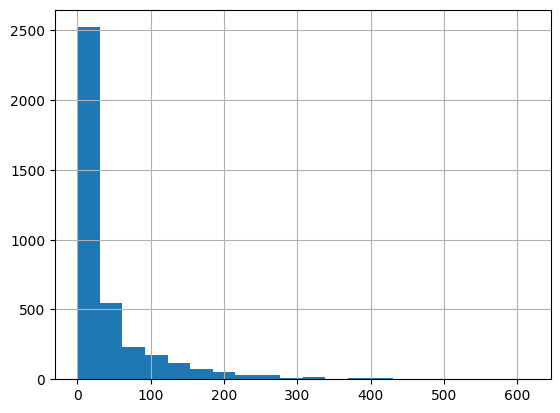

In [18]:
airbnb_boston['number_of_reviews'].hist(bins=20)
plt.show()

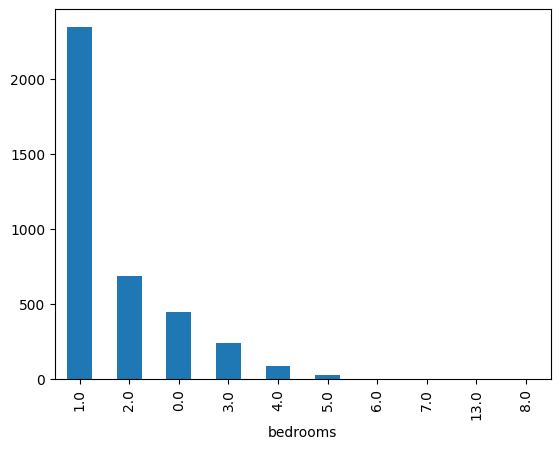

In [19]:
airbnb_boston['bedrooms'].value_counts().plot.bar()
plt.show()

In [21]:
airbnb_boston['price'][:5] # problam je dolar signa ki ga moremo odstranit

0    $125.00
1    $145.00
2    $169.00
3     $99.00
4    $150.00
Name: price, dtype: object

In [22]:
airbnb_boston['cleaning_fee'][:5] # problam je dolar signa ki ga moremo odstranit

0     $75.00
1     $60.00
2     $80.00
3    $250.00
4    $250.00
Name: cleaning_fee, dtype: object

C:\Users\Fakulteta\Desktop\gitFolder\python-machine-learning-public\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


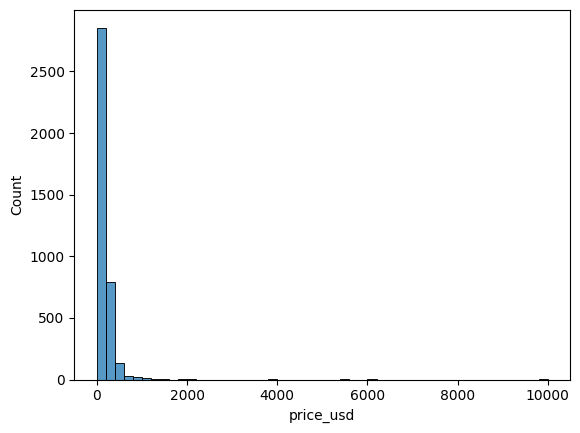

In [23]:
airbnb_boston['price_usd'] = airbnb_boston['price'].str.replace("$", "").str.replace(",", "").astype("float")
airbnb_boston['cleaning_fee_usd'] = airbnb_boston['cleaning_fee'].str.replace("$", "").str.replace(",", "").astype("float")
airbnb_boston.drop(columns=["price", "cleaning_fee"], inplace=True)
sns.histplot(airbnb_boston['price_usd'], bins=50)
plt.show()

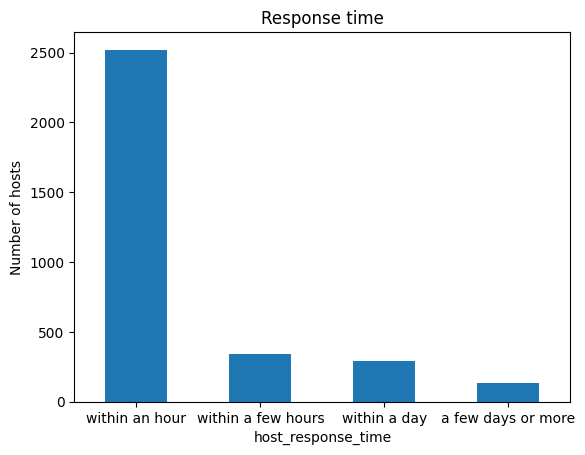

In [24]:
# bar plots for categorical variables
airbnb_boston['host_response_time'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of hosts')
plt.title('Response time')
plt.show()

## Quantifying missing data

In [26]:
airbnb_boston.isnull().sum()

id                                0
name                              0
summary                          80
access                         1637
interaction                    1256
house_rules                     990
host_id                           0
host_since                        0
host_location                     3
host_response_time              562
host_response_rate              562
host_acceptance_rate            260
host_is_superhost                 0
host_neighbourhood              221
host_total_listings_count         0
host_verifications                0
host_identity_verified            0
neighbourhood                     0
neighbourhood_cleansed            0
zipcode                          14
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         3
bedrooms                    

In [27]:
airbnb_boston.isnull().mean() * 100

id                              0.000000
name                            0.000000
summary                         2.080624
access                         42.574772
interaction                    32.665800
house_rules                    25.747724
host_id                         0.000000
host_since                      0.000000
host_location                   0.078023
host_response_time             14.616385
host_response_rate             14.616385
host_acceptance_rate            6.762029
host_is_superhost               0.000000
host_neighbourhood              5.747724
host_total_listings_count       0.000000
host_verifications              0.000000
host_identity_verified          0.000000
neighbourhood                   0.000000
neighbourhood_cleansed          0.000000
zipcode                         0.364109
latitude                        0.000000
longitude                       0.000000
is_location_exact               0.000000
property_type                   0.000000
room_type       

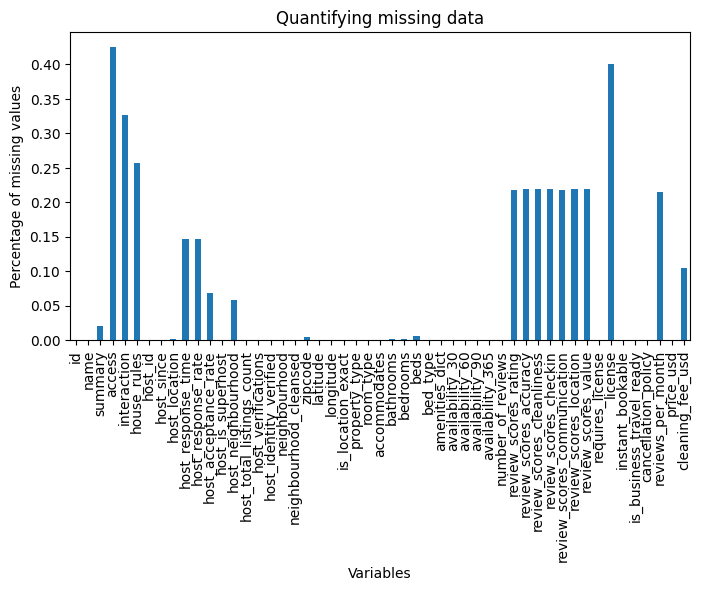

In [28]:
airbnb_boston.isnull().mean().plot.bar(figsize=(8,4))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

In [29]:
columns_to_remove = ["id", "name", "summary", "access", "interaction", "host_id", "host_verifications", "license"]
airbnb_boston.drop(columns=columns_to_remove, inplace=True)
airbnb_boston.head()

,house_rules,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_dict,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month,price_usd,cleaning_fee_usd
0,"No pets, no smoking.",2008-12-03,Massachusetts,within a few hours,100%,44%,t,East Boston,5,f,East Boston,East Boston,2128,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",11,20,20,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,super_strict_30,0.28,125.0,75.0
1,No Smoking in the Building.,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,t,Roxbury,Roxbury,2119,42.32981,-71.09559,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",1,14,44,307,106,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,t,f,strict_14_with_grace_period,0.79,145.0,60.0
2,No Smoking in the Building.,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,t,Roxbury,Roxbury,2119,42.32994,-71.09351,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",1,4,19,266,115,96.0,10.0,10.0,10.0,10.0,9.0,10.0,t,t,f,strict_14_with_grace_period,0.88,169.0,80.0
3,NaN,2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,f,Beacon Hill,Downtown,2108,42.35919,-71.06265,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",17,42,42,290,24,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,0.35,99.0,250.0
4,"NO SMOKING, NO PETS. $100 move-in fee payable ...",2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,f,Beacon Hill,Downtown,2108,42.35840,-71.06185,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",28,29,29,42,31,95.0,10.0,9.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,0.24,150.0,250.0


In [30]:
airbnb_boston.shape

(3845, 43)

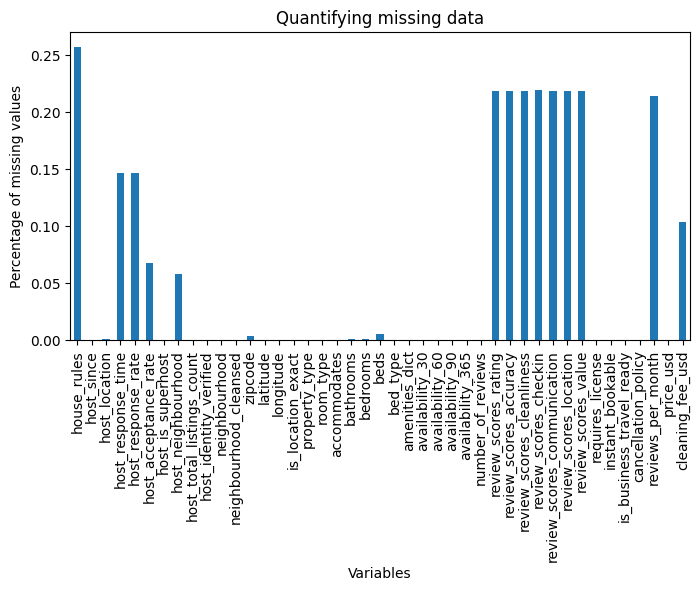

In [31]:
airbnb_boston.isnull().mean().plot.bar(figsize=(8,4))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

## Determining cardinality in categorical variables

In [32]:
airbnb_boston.nunique()

house_rules                    1531
host_since                     1080
host_location                   123
host_response_time                4
host_response_rate               35
host_acceptance_rate             73
host_is_superhost                 2
host_neighbourhood               65
host_total_listings_count        51
host_identity_verified            2
neighbourhood                    31
neighbourhood_cleansed           25
zipcode                          54
latitude                       2838
longitude                      2968
is_location_exact                 2
property_type                    21
room_type                         4
accommodates                     19
bathrooms                        12
bedrooms                         10
beds                             16
bed_type                          5
amenities_dict                 2908
availability_30                  31
availability_60                  61
availability_90                  91
availability_365            

In [33]:
airbnb_boston['property_type'].unique()

array(['Apartment', 'Guest suite', 'Condominium', 'Aparthotel', 'House',
       'Boat', 'Townhouse', 'Bed and breakfast', 'Loft', 'Bungalow',
       'Other', 'Villa', 'Guesthouse', 'Castle', 'Serviced apartment',
       'Houseboat', 'Barn', 'Boutique hotel', 'Hotel', 'Cottage',
       'Hostel'], dtype=object)

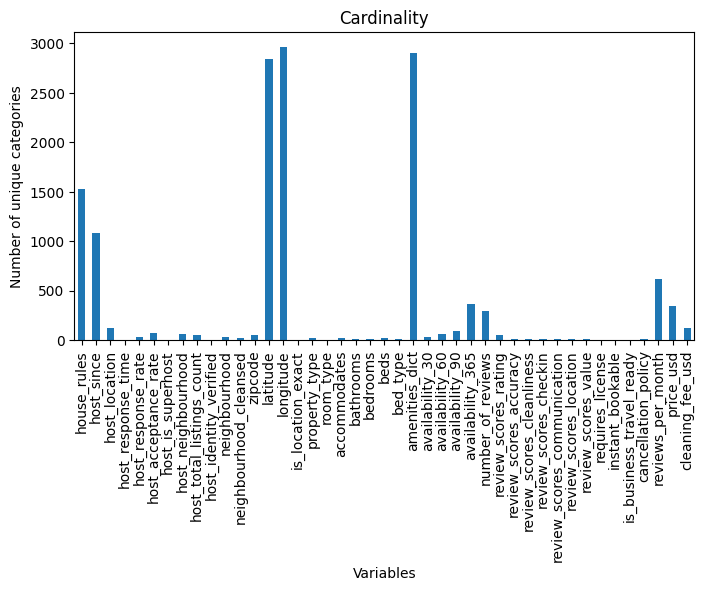

In [34]:
airbnb_boston.nunique().plot.bar(figsize=(8,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

## Pinpointing rare categories in categorical variables

In [35]:
airbnb_boston['property_type'].unique()

array(['Apartment', 'Guest suite', 'Condominium', 'Aparthotel', 'House',
       'Boat', 'Townhouse', 'Bed and breakfast', 'Loft', 'Bungalow',
       'Other', 'Villa', 'Guesthouse', 'Castle', 'Serviced apartment',
       'Houseboat', 'Barn', 'Boutique hotel', 'Hotel', 'Cottage',
       'Hostel'], dtype=object)

In [36]:
label_freq = airbnb_boston['property_type'].value_counts() / len(airbnb_boston) * 100
print(label_freq)

property_type
Apartment             62.756827
House                 16.020806
Condominium            8.452536
Serviced apartment     2.444733
Bed and breakfast      2.444733
Townhouse              2.288687
Guest suite            1.768531
Hotel                  1.300390
Loft                   0.832250
Other                  0.546164
Boutique hotel         0.468140
Guesthouse             0.182055
Villa                  0.104031
Boat                   0.104031
Bungalow               0.078023
Houseboat              0.078023
Castle                 0.026008
Barn                   0.026008
Aparthotel             0.026008
Cottage                0.026008
Hostel                 0.026008
Name: count, dtype: float64


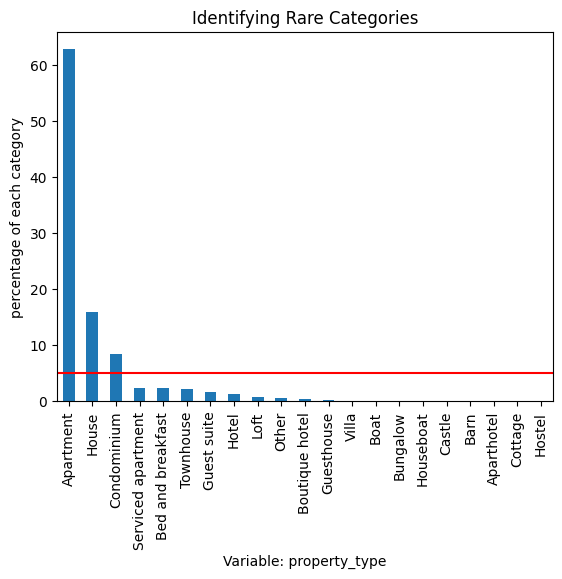

In [37]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=5, color='red')
fig.set_ylabel('percentage of each category')
fig.set_xlabel('Variable: property_type')
fig.set_title('Identifying Rare Categories')
plt.show()

## Identifying a linear relationship

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
np.random.seed(29)
x = np.random.randn(200)

In [40]:
y = x * 10 + np.random.randn(200) * 2

In [42]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

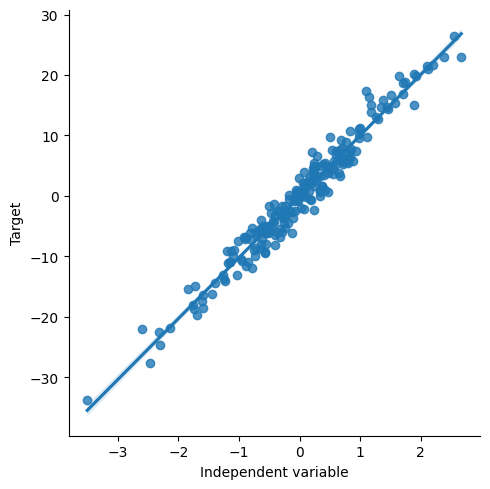

In [43]:
# we used the seaborn lmplot() method, which allows us to plot the data and fit and display a linear model on top of it
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')
plt.show()

In [46]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

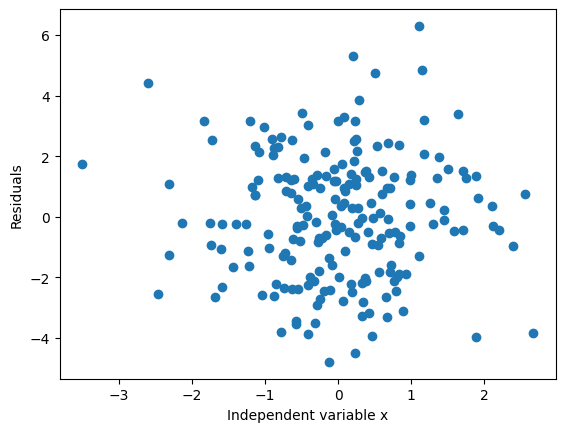

In [47]:
# Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['x'].to_frame())

# Calculate the residuals, that is, the difference between the predictions and the real outcome, y:
residuals = data['y'] - predictions

# Make a scatter plot of the independent variable x and the residuals:
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')
plt.show()

C:\Users\Fakulteta\Desktop\gitFolder\python-machine-learning-public\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


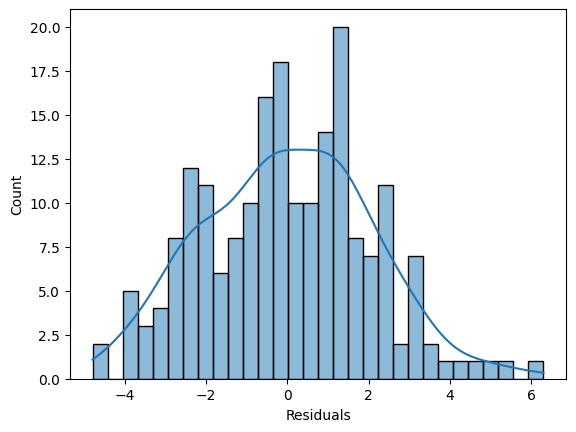

In [48]:
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.show()

### Example: Boston House price data

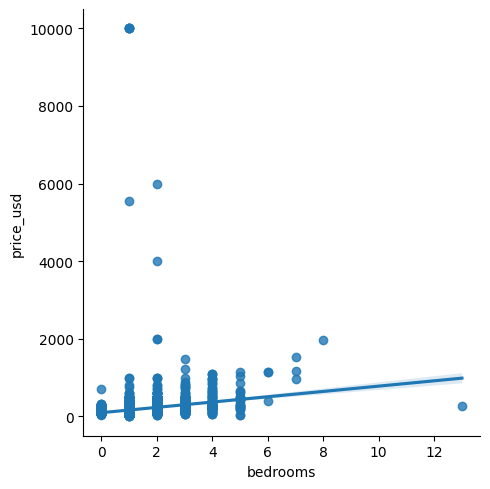

In [49]:
# we plot the variable LAST (% lower status of the population)
# vs the target MEDV (median value of the house)
sns.lmplot(x="bedrooms", y="price_usd", data=airbnb_boston, order=1)
plt.show()

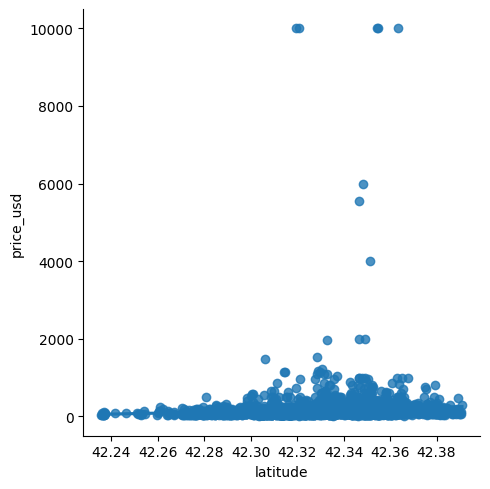

In [50]:
sns.lmplot(x="latitude", y="price_usd", data=airbnb_boston, order=1)
plt.show()

## Identifying a normal distribution

In [52]:
np.random.seed(29)
x = np.random.randn(200)

In [53]:
data = pd.DataFrame([x]).T
data.columns = ['x']

C:\Users\Fakulteta\Desktop\gitFolder\python-machine-learning-public\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


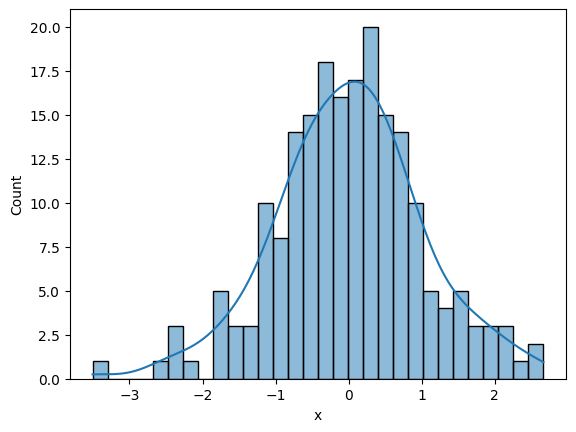

In [54]:
sns.histplot(data['x'], bins=30, kde=True)
plt.show()

### Q-Q plot

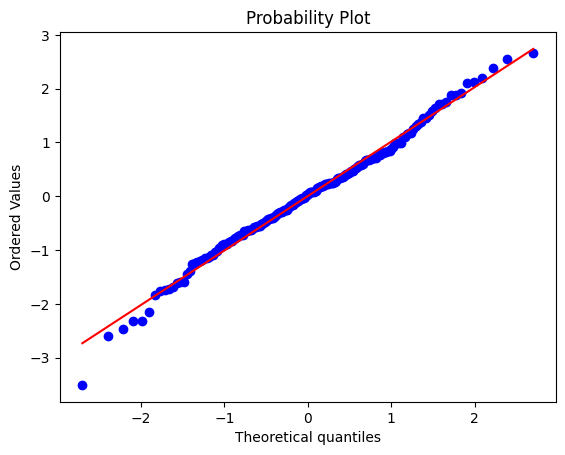

In [56]:
stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

### Example: Boston House price data

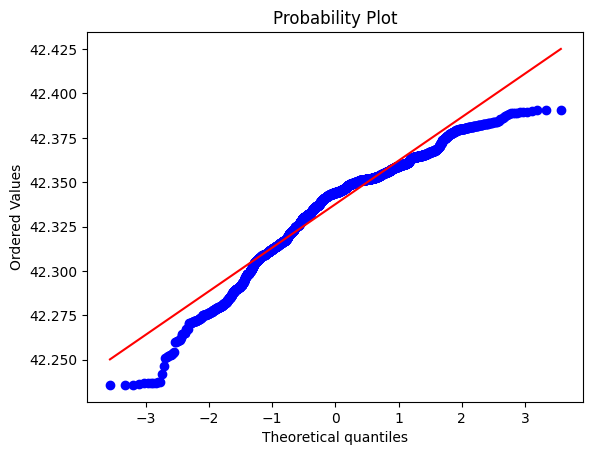

In [57]:
stats.probplot(airbnb_boston['latitude'], dist="norm", plot=plt)
plt.show()

C:\Users\Fakulteta\Desktop\gitFolder\python-machine-learning-public\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


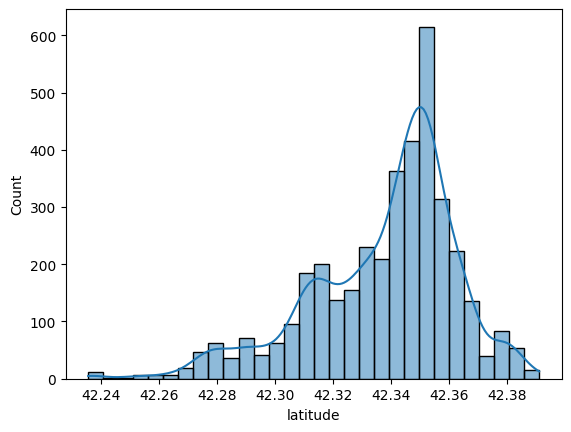

In [60]:
sns.histplot(airbnb_boston['latitude'], bins=30, kde=True)
plt.show()

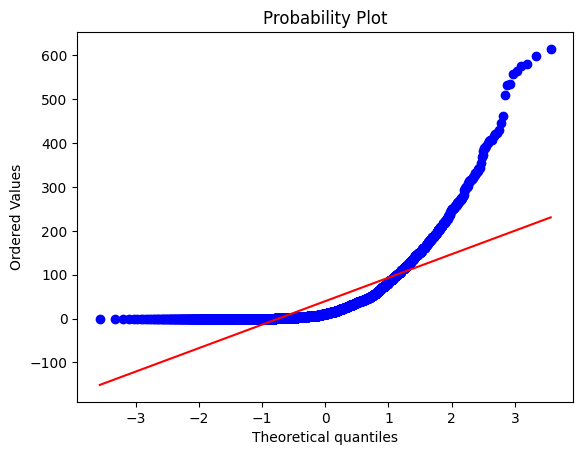

In [58]:
stats.probplot(airbnb_boston['number_of_reviews'], dist="norm", plot=plt)
plt.show()

C:\Users\Fakulteta\Desktop\gitFolder\python-machine-learning-public\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


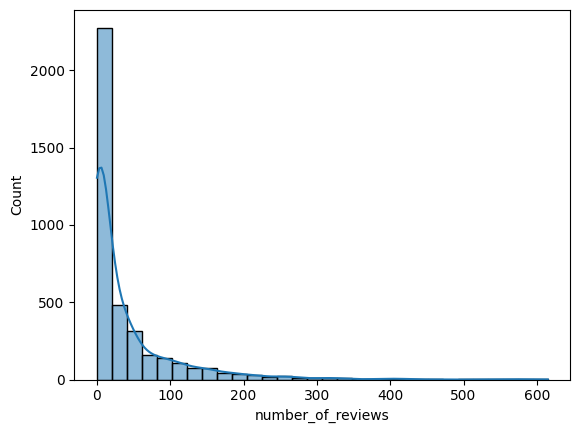

In [59]:
sns.histplot(airbnb_boston['number_of_reviews'], bins=30, kde=True)
plt.show()

## Distinguishing variable distribution

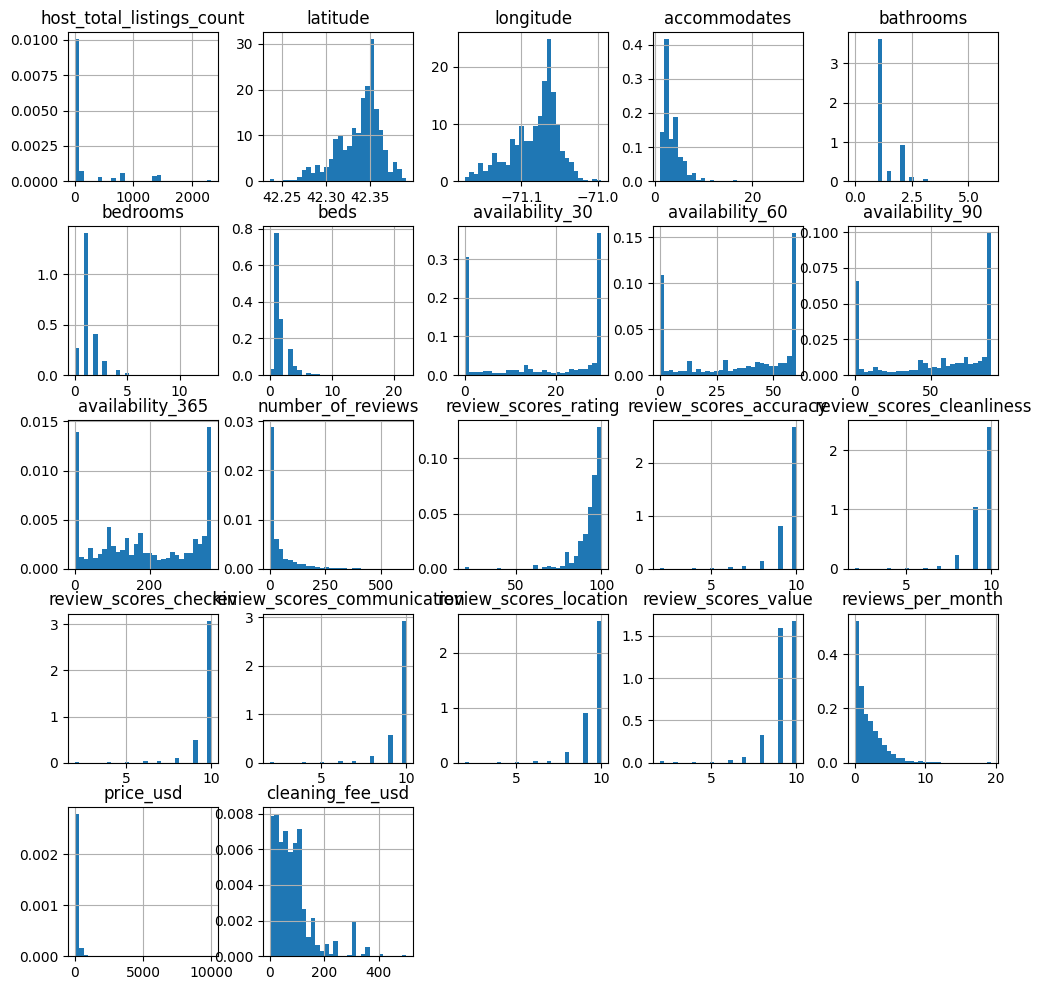

In [66]:
airbnb_boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

## Highlighting outliers

In this recipe, we will learn how to identify outliers using boxplots and the inter-quartile
range (IQR) proximity rule. According to the IQR proximity rule, a value is an outlier if it
falls outside these boundaries:

    Upper boundary = 75th quantile + (IQR * 1.5)
    Lower boundary = 25th quantile - (IQR * 1.5)

Here, IQR is given by the following equation:

    IQR = 75th quantile - 25th quantile

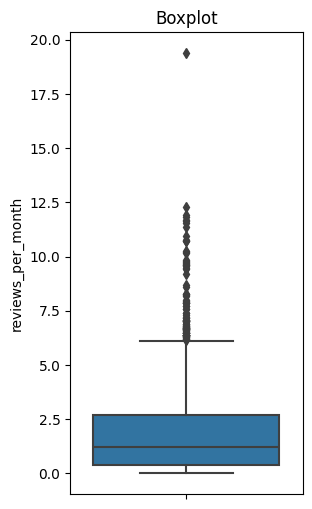

In [67]:
plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_boston['reviews_per_month'])
plt.title('Boxplot')
plt.show()

In [68]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [71]:
upper_boundary, lower_boundary = find_boundaries(airbnb_boston, 'price_usd', 3)
upper_boundary, lower_boundary

(563.0, -284.0)

In [81]:
outliers = np.where(airbnb_boston['price_usd'] > upper_boundary, True, np.where(airbnb_boston['price_usd'] < lower_boundary, True, False))

In [82]:
outliers_df = airbnb_boston.loc[outliers, 'price_usd']
outliers_df.head()

36     6000.0
126     890.0
178     695.0
321     637.0
351     600.0
Name: price_usd, dtype: float64

To remove the outliers from the dataset, execute: `boston.loc[~outliers, 'RM']`.

## Comparing feature magnitude

In [83]:
airbnb_boston.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,price_usd,cleaning_fee_usd
count,3845.000000,3845.000000,3845.000000,3845.000000,3842.000000,3841.000000,3825.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3006.000000,3004.000000,3005.000000,3003.000000,3006.000000,3004.000000,3004.000000,3020.000000,3845.000000,3446.000000
mean,186.069961,42.337622,-71.082284,3.224187,1.282275,1.297058,1.736993,16.381534,35.145384,54.440572,185.347724,39.779974,93.028942,9.566911,9.492512,9.725608,9.650366,9.577563,9.236019,1.827662,182.451235,81.878700
std,428.388936,0.025206,0.031559,2.243429,0.517746,0.934308,1.371922,13.090230,24.034984,34.862826,133.262730,67.862814,9.156733,0.946373,0.891796,0.786271,0.898054,0.785934,1.003434,1.872423,407.777077,74.059595
min,0.000000,42.235760,-71.173950,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,0.000000,0.000000
25%,2.000000,42.322550,-71.101850,2.000000,1.000000,1.000000,1.000000,0.000000,8.000000,17.000000,70.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.400000,79.000000,30.000000
50%,7.000000,42.344130,-71.073250,2.000000,1.000000,1.000000,1.000000,20.000000,43.000000,66.000000,176.000000,11.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.220000,133.000000,70.000000
75%,46.000000,42.353300,-71.061300,4.000000,1.500000,2.000000,2.000000,30.000000,59.000000,89.000000,327.000000,46.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.700000,200.000000,100.000000
max,2324.000000,42.390950,-70.995950,29.000000,6.000000,13.000000,22.000000,30.000000,60.000000,90.000000,365.000000,615.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,19.380000,10000.000000,500.000000


In [84]:
airbnb_boston.select_dtypes(exclude="object").max() - airbnb_boston.select_dtypes(exclude="object").min()

host_total_listings_count       2324.00000
latitude                           0.15519
longitude                          0.17800
accommodates                      28.00000
bathrooms                          6.00000
bedrooms                          13.00000
beds                              22.00000
availability_30                   30.00000
availability_60                   60.00000
availability_90                   90.00000
availability_365                 365.00000
number_of_reviews                615.00000
review_scores_rating              80.00000
review_scores_accuracy             8.00000
review_scores_cleanliness          8.00000
review_scores_checkin              8.00000
review_scores_communication        8.00000
review_scores_location             8.00000
review_scores_value                8.00000
reviews_per_month                 19.37000
price_usd                      10000.00000
cleaning_fee_usd                 500.00000
dtype: float64